In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1) Yield vs Temp

In [126]:
df=pd.read_csv('/home/ustudent/Pranav_220962250/Week4/experiment.csv')

In [127]:
X=df['temp'].values
Y=df['yield'].values
n=15

#### Simple Linear
Pedhazur formula

In [128]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

num = np.sum((X-mean_x)*(Y-mean_y))
den = np.sum((X-mean_x)**2)

B1 = num/den
B0 = mean_y - B1 * mean_x

y_pred = B0 + B1 * X

In [129]:
mse = (np.sum((Y - y_pred)**2)/n)
rmse = np.sqrt(mse)
print(f'Simple linear equation: y={B0:.5f}+ {B1:.5f}*x')
print(f'MSE: {mse}, RMSE: {rmse}')

Simple linear equation: y=2.30631+ 0.00676*x
MSE: 0.13270870870870877, RMSE: 0.36429206511905904


Calculus method

In [130]:
X_design = np.vstack([np.ones(n), X]).T

coefficients = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ Y
B0_calculus, B1_calculus = coefficients

print(f'Calculus Method - B0 (intercept): {B0_calculus}')
print(f'Calculus Method - B1 (slope): {B1_calculus}')

Calculus Method - B0 (intercept): 2.3063063063063094
Calculus Method - B1 (slope): 0.006756756756756757


#### Polynomial Regression

In [131]:
mat_X = np.array([
    [np.sum(X**4), np.sum(X**3), np.sum(X**2)],
    [np.sum(X**3), np.sum(X**2), np.sum(X)],
    [np.sum(X**2), np.sum(X), len(X)]
])

mat_Y = np.array([
    [np.sum(Y * (X**2))],
    [np.sum(Y * X)],
    [np.sum(Y)]
])

B2, B1, B0 = np.linalg.solve(mat_X, mat_Y)

print(f'B0 = {B0[0]:.5f} , B1 = {B1[0]:.5f} , B2 = {B2[0]:.5f}')

y_poly = B0 + B1 * X + B2 * (X**2)


B0 = 7.96048 , B1 = -0.15371 , B2 = 0.00108


In [132]:
mse = (np.sum((Y - y_poly)**2)/n)
rmse = np.sqrt(mse)

print(f'Polynomial equation: y={B0} + {B1}*x + {B2}*x**2')
print(f'MSE: {mse}, RMSE: {rmse}')

Polynomial equation: y=[7.9604811] + [-0.15371134]*x + [0.0010756]*x**2
MSE: 0.04778465063001143, RMSE: 0.2185970050801507


Text(0, 0.5, 'Yield')

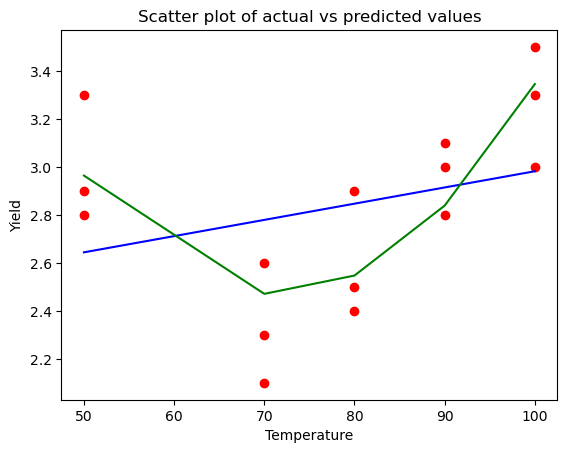

In [133]:
plt.scatter(X, Y, color='red')
plt.plot(X, y_pred, color='blue')
plt.plot(X, y_poly, color='green')
plt.title('Scatter plot of actual vs predicted values')
plt.xlabel('Temperature')
plt.ylabel('Yield')

### 2) Heart infection

In [134]:
fd=pd.read_csv('/home/ustudent/Pranav_220962250/Week4/heart.csv')


In [135]:
X1 = fd['Area']
X2 = fd['X2']
y = fd['Infarc']
X3 = fd['X3']

In [136]:
mat1 = np.array([[len(X1),np.sum(X1),np.sum(X2),np.sum(X3)],
                 [np.sum(X1),np.sum(X1**2),np.sum(X1*X2),np.sum(X1*X3)],
                 [np.sum(X2),np.sum(X1*X2),np.sum(X2**2),np.sum(X3*X2)],
                 [np.sum(X3),np.sum(X1*X3),np.sum(X2*X3),np.sum(X2)]])

mat2 = np.array([[np.sum(y),np.sum(X1*y),np.sum(X2*y),np.sum(X3*y)]])

coeffs = np.dot(np.linalg.inv(mat1),mat2.T)

b0,b1,b2,b3 = coeffs[0,0],coeffs[1,0],coeffs[2,0],coeffs[3,0]

y_prd = b0 + b1*X1+ b2*(X2) +b3*X3
squared_err = (y-y_prd)**2

rmse_mat = np.sqrt(np.mean(squared_err))

print("Mean Squared Error: ")
print(np.mean(squared_err))

print("Coefficients: ")
print(f"b0: {b0}\nb1: {b1}\nb2: {b2}\nb3: {b3}")

print("y_pred: ")
print(y_prd)

print("RMSE matrix:")
print(rmse_mat)


Mean Squared Error: 
0.0170284226245642
Coefficients: 
b0: -0.13453637823600895
b1: 0.6126549752681919
b2: -0.24348223339581987
b3: -0.0656556947388709
y_pred: 
0     0.073766
1     0.257563
2     0.331081
3     0.373967
4     0.312702
5     0.367841
6     0.447486
7     0.514878
8     0.600650
9     0.766066
10   -0.108450
11    0.093726
12    0.173371
13    0.277522
14    0.240763
15    0.253016
16    0.332661
17    0.363294
18    0.357167
19    0.369420
20    0.228510
21    0.271552
22    0.443096
23    0.449222
24    0.424716
25    0.406336
26    0.394083
27    0.485981
28    0.553374
29    0.528867
30    0.547247
31    0.657525
dtype: float64
RMSE matrix:
0.13049299837372194
